### Visualizing data with seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('mpg')
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### Examine the value_counts of 'cylinders' and 'model_year' - are these actually categorical variables in disguise?

In [7]:
print(f'cylinders value counts :', df['cylinders'].value_counts())
print(f'model_year value counts :', df['model_year'].value_counts())

cylinders value counts : cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
model_year value counts : model_year
73    40
78    36
76    34
82    31
75    30
80    29
79    29
81    29
70    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64


Let's convert 'cylinders', and leave 'model_year' as numerical

In [8]:
df['cylinders'] = df['cylinders'].astype('category')

#### Let's get a look at the numerical values plotted against one another, using a pairplot

<Figure size 1000x600 with 0 Axes>

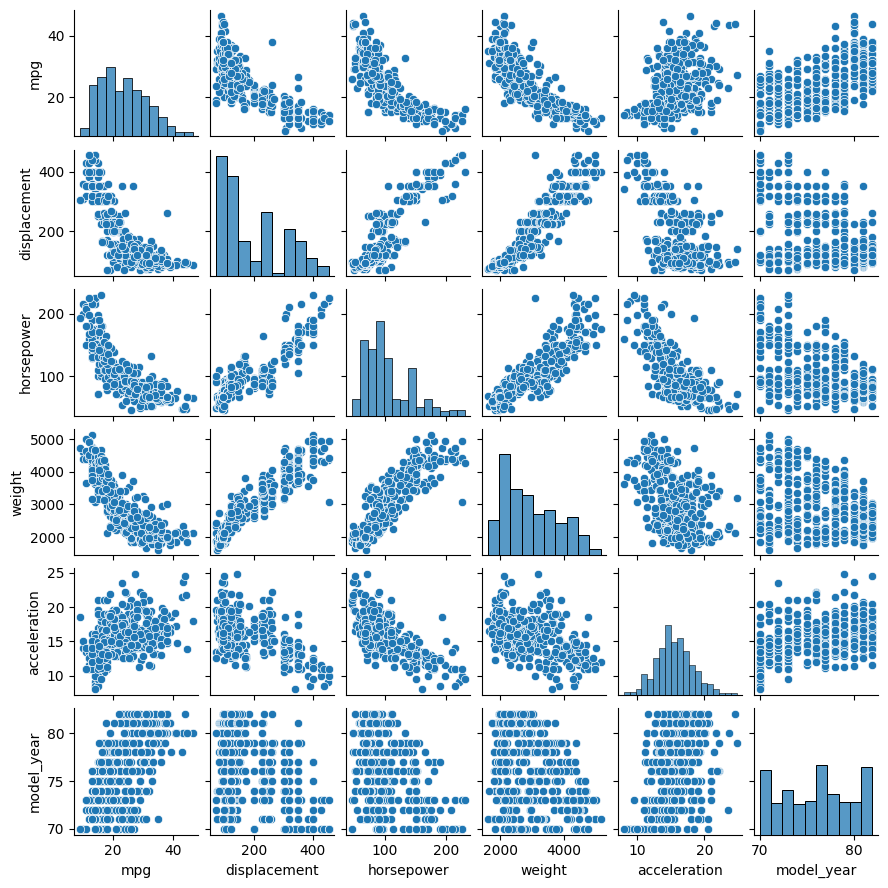

In [9]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, height=1.5, aspect=1)
plt.show()

#### Now let's examine the distribution of each variable in detail

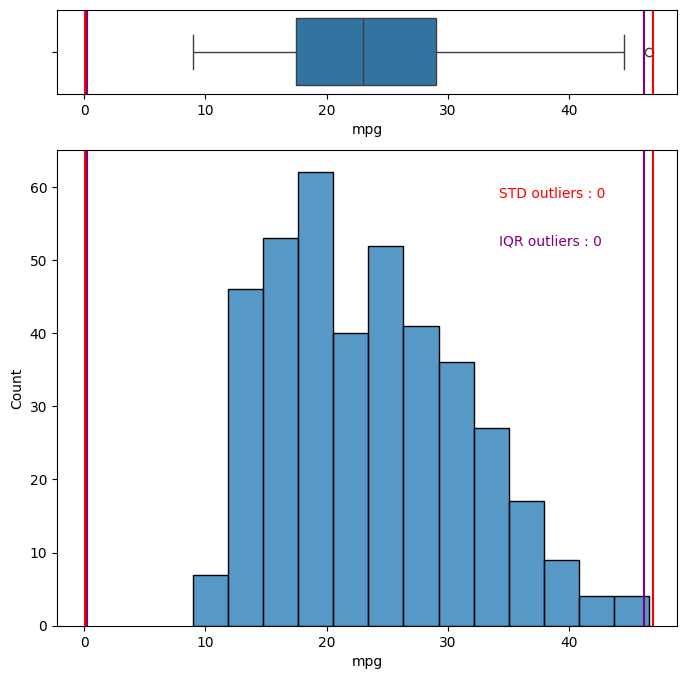

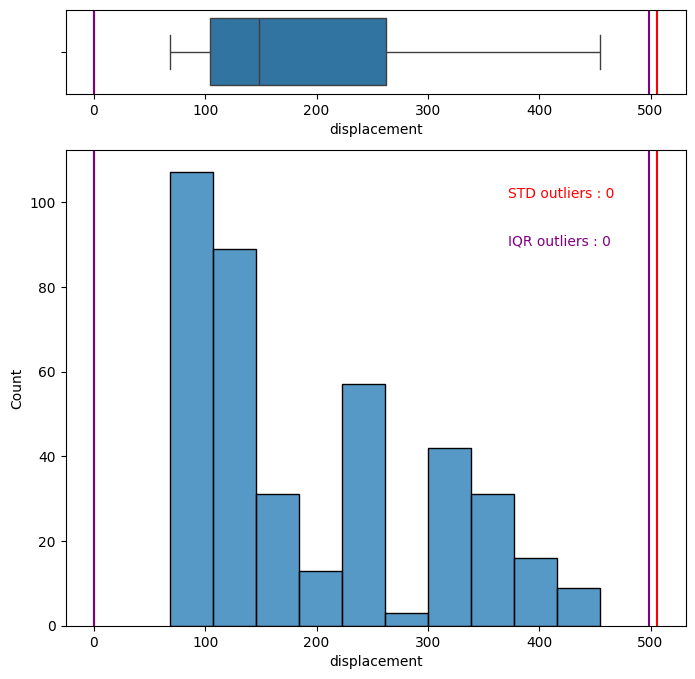

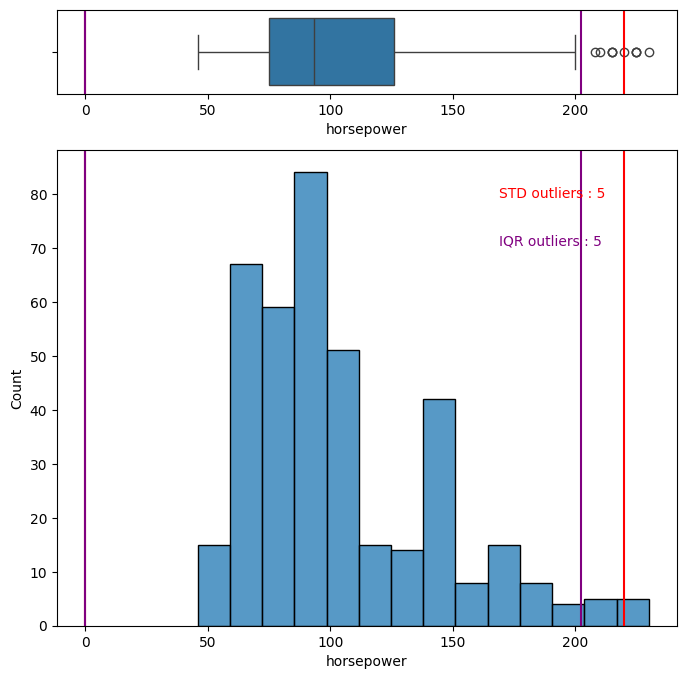

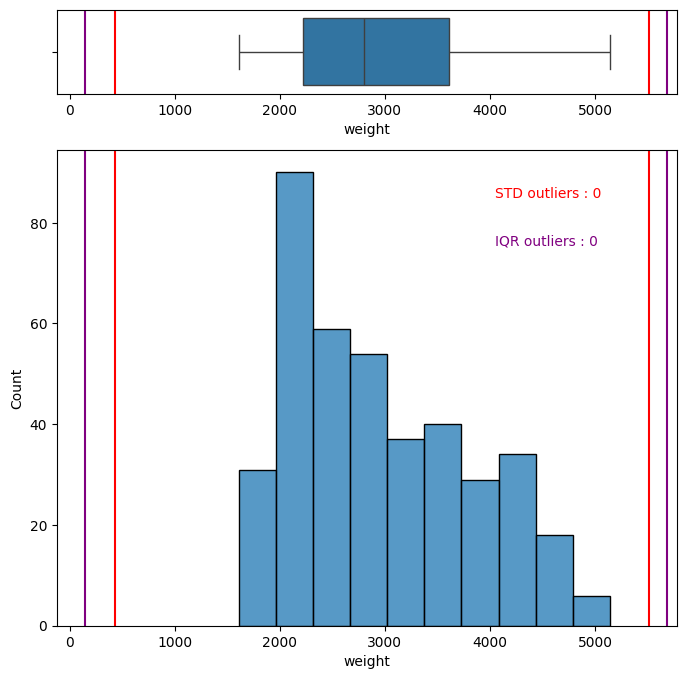

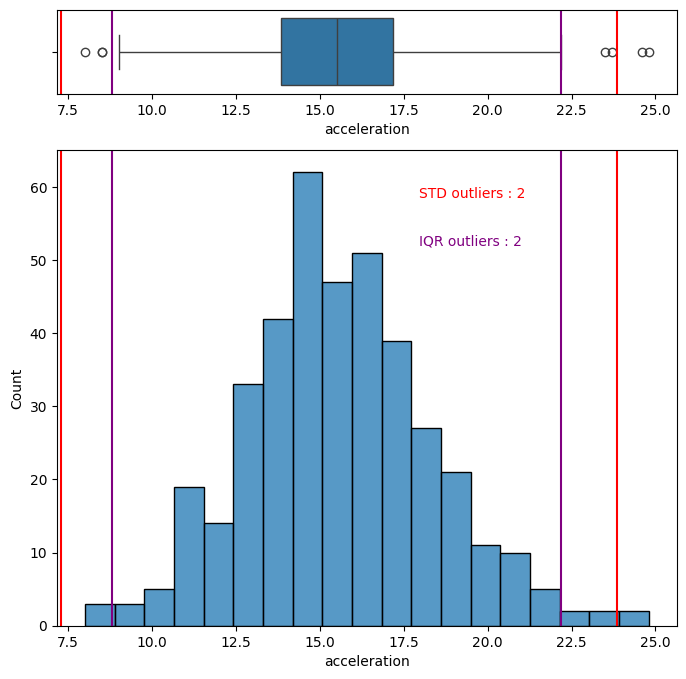

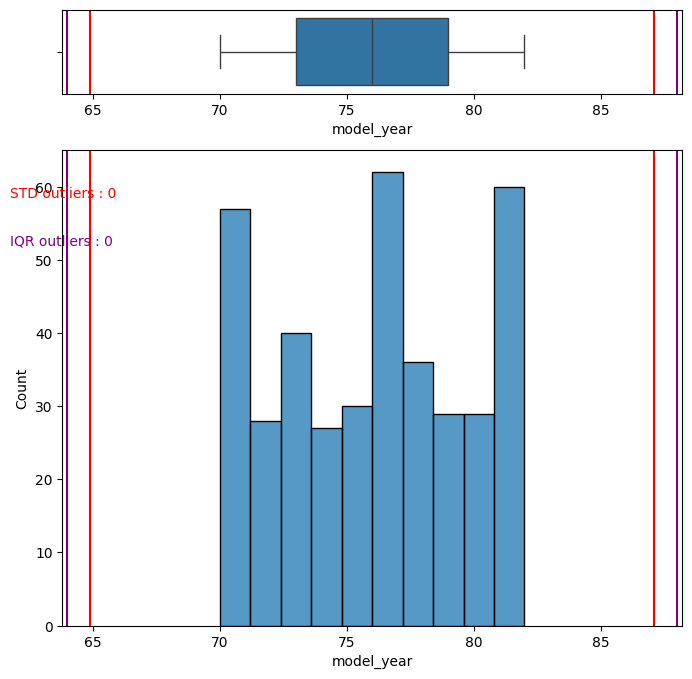

In [27]:
df_numerical = df.select_dtypes('number')
for col in df_numerical.columns:

    # Calculate the values at mean + 3 * std
    total_count = df[col].count()
    mean = df[col].mean()
    std = df[col].std()
    outlier_right_threshold = mean + 3 * std
    outlier_left_threshold = max(mean - 3 * std, 0)

    # Calculate the values at quartiles +/- 1.5 * IQR
    quartile_25 = df[col].quantile(0.25)
    quartile_75 = df[col].quantile(0.75)
    IQR = quartile_75 - quartile_25
    outlier_left_IQR = max(quartile_25 - 1.5 * IQR, 0)
    outlier_right_IQR = quartile_75 + 1.5 * IQR
    
    std_outlier_count = df[col][ (df[col] > outlier_right_threshold) | (df[col] < outlier_left_threshold) ].count()
    iqr_outlier_count = df[col][ (df[col] > outlier_right_IQR) | (df[col] < outlier_left_IQR) ].count()

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), gridspec_kw={'height_ratios': [0.15, 0.85]})
    sns.boxplot(df_numerical, x=df[col], ax=axes[0])
    axes[0].axvline(x=outlier_left_threshold, color='red', label='outlier')
    axes[0].axvline(x=outlier_right_threshold, color='red', label='outlier')
    axes[0].axvline(x=outlier_left_IQR, color='purple', label='outlier')
    axes[0].axvline(x=outlier_right_IQR, color='purple', label='outlier')

    sns.histplot(df_numerical, x=df[col], ax=axes[1])
    axes[1].axvline(x=outlier_left_threshold, color='red', label='outlier')
    axes[1].axvline(x=outlier_right_threshold, color='red', label='outlier')
    axes[1].axvline(x=outlier_left_IQR, color='purple', label='outlier')
    axes[1].axvline(x=outlier_right_IQR, color='purple', label='outlier')
    axes[1].text(
        x=axes[1].get_xlim()[1] * 0.7,
        y=axes[1].get_ylim()[1] * 0.9, 
        s=f'STD outliers : {std_outlier_count}',
        color='red')
    axes[1].text(
        x=axes[1].get_xlim()[1] * 0.7,
        y=axes[1].get_ylim()[1] * 0.8, 
        s=f'IQR outliers : {std_outlier_count}',
        color='purple')
    plt.show()